# Comparing L1 Cache Configurations

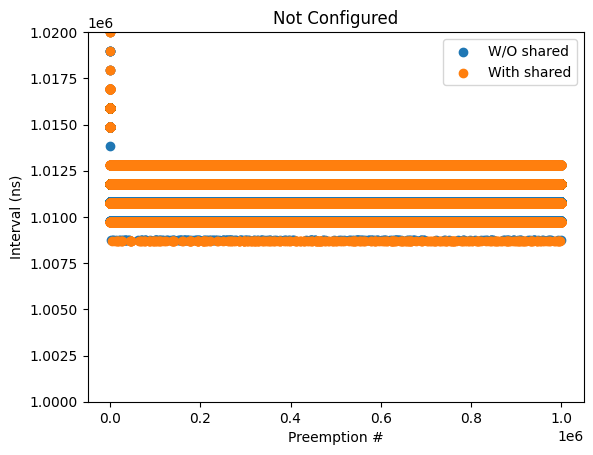

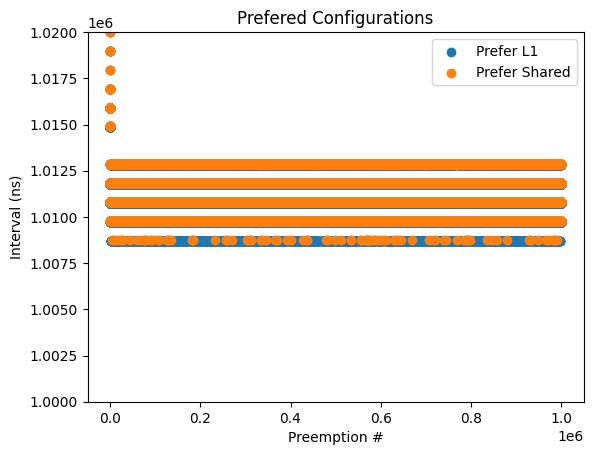

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# ----- Load the data -----
dataPath = '../Data/saxpyData/'

# Default configurations
# read in data
mill1 = pd.read_csv(dataPath+'loopTests/saxpyMillion.csv')
mill1Shared = pd.read_csv(dataPath+'loopTests/saxpyMillionSharedReal.csv')

# name columns
mill1.columns = ['start', 'end']
mill1Shared.columns = ['start', 'end']
mill1['interval'] = mill1['end'] - mill1['start']
mill1Shared['interval'] = mill1Shared['end'] - mill1Shared['start']

# Setting configurations
# read in data
preferL1 = pd.read_csv(dataPath+'cacheConfigData/saxpyPreferL1.csv')
preferShared = pd.read_csv(dataPath+'cacheConfigData/saxpyPreferShared.csv')

# name columns
preferL1.columns = ['start', 'end']
preferShared.columns = ['start', 'end']
preferL1['interval'] = preferL1['end'] - preferL1['start']
preferShared['interval'] = preferShared['end'] - preferShared['start']

# ----- Plot the data -----
NUM_SAMPLES = 1000000
# Plot all intervals
plt.scatter(range(1, NUM_SAMPLES), mill1['interval'], label='W/O shared')
plt.scatter(range(1, NUM_SAMPLES), mill1Shared['interval'], label='With shared')

# Add labels and title
plt.xlabel('Preemption #')
plt.ylabel('Interval (ns)')
plt.title('Not Configured')

# Add legend
plt.legend(loc='upper right')

# Set y-axis limits
plt.ylim(1.0*1e6, 1.02*1e6)

#plt.yticks(range(1010, 1030))

# Show the plot
plt.show()

# Plot all intervals
plt.scatter(range(1, NUM_SAMPLES), preferL1['interval'], label='Prefer L1')
plt.scatter(range(1, NUM_SAMPLES), preferShared['interval'], label='Prefer Shared')

# Add labels and title
plt.xlabel('Preemption #')
plt.ylabel('Interval (ns)')
plt.title('Prefered Configurations')

# Add legend
plt.legend(loc='upper right')

# Set y-axis limits
plt.ylim(1.0*1e6, 1.02*1e6)

#plt.yticks(range(1010, 1030))

# Show the plot
plt.show()

### Intervals containing the preemptions

In [8]:
# Calculate interval that contains saxpy execution and preemptions
no_shared_ivls_mill = []
shared_ivls_mill = []
preferL1_ivls = []
preferShared_ivls = []
for i in range(0, len(mill1)-1):
  no_shared_ivls_mill.append(mill1['start'][i+1] - mill1['end'][i])
  shared_ivls_mill.append(mill1Shared['start'][i+1] - mill1Shared['end'][i])
  preferL1_ivls.append(preferL1['start'][i+1] - preferL1['end'][i])
  preferShared_ivls.append(preferShared['start'][i+1] - preferShared['end'][i])

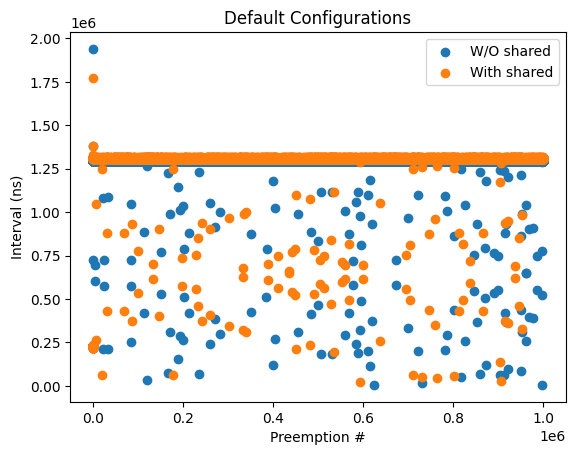

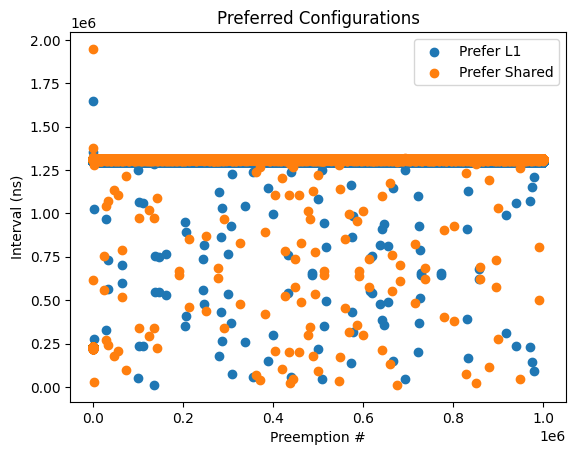

In [9]:
# ----------Plot default configurations ----------
plt.scatter(range(1, NUM_SAMPLES-1), no_shared_ivls_mill, label='W/O shared')
plt.scatter(range(1, NUM_SAMPLES-1), shared_ivls_mill, label='With shared')

# Add labels and title
plt.xlabel('Preemption #')
plt.ylabel('Interval (ns)')
plt.title('Default Configurations')

# Add legend
plt.legend(loc='upper right')

#plt.yticks(range(1010, 1030))

# Show the plot
plt.show()


# ---------- Plot preferred configurations ----------
plt.scatter(range(1, NUM_SAMPLES-1), preferL1_ivls, label='Prefer L1')
plt.scatter(range(1, NUM_SAMPLES-1), preferShared_ivls, label='Prefer Shared')

# Add labels and title
plt.xlabel('Preemption #')
plt.ylabel('Interval (ns)')
plt.title('Preferred Configurations')

# Add legend
plt.legend(loc='upper right')

#plt.yticks(range(1010, 1030))

# Show the plot
plt.show()

### Zoom-in

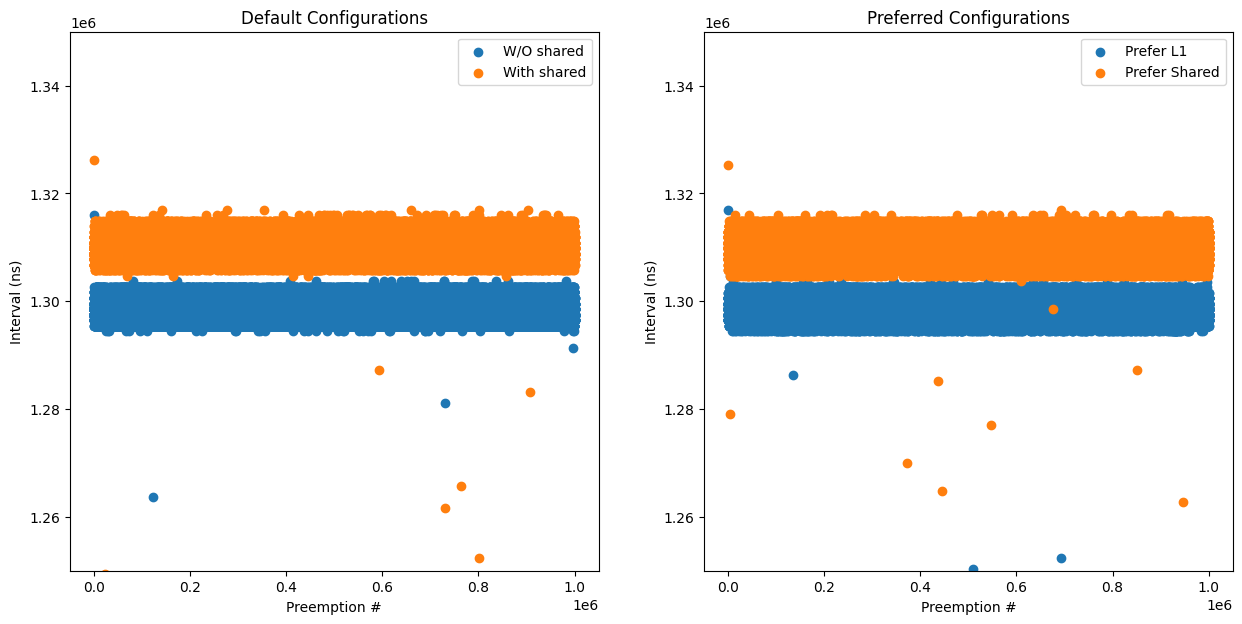

In [12]:
# ----------Plot default configurations ----------
# Create the subplot
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

# Default subplot
ax1.scatter(range(1, NUM_SAMPLES-1), no_shared_ivls_mill, label='W/O shared')
ax1.scatter(range(1, NUM_SAMPLES-1), shared_ivls_mill, label='With shared')

# Add labels and title
ax1.set_xlabel('Preemption #')
ax1.set_ylabel('Interval (ns)')
ax1.set_title('Default Configurations')

# Add legend
ax1.legend(loc='upper right')

# Set y-axis limits
ax1.set_ylim(1.25*1e6, 1.35*1e6)

#plt.yticks(range(1010, 1030))

# ---------- Plot preferred configurations ----------
ax2.scatter(range(1, NUM_SAMPLES-1), preferL1_ivls, label='Prefer L1')
ax2.scatter(range(1, NUM_SAMPLES-1), preferShared_ivls, label='Prefer Shared')

# Add labels and title
ax2.set_xlabel('Preemption #')
ax2.set_ylabel('Interval (ns)')
ax2.set_title('Preferred Configurations')

# Add legend
ax2.legend(loc='upper right')

# Set y-axis limits
ax2.set_ylim(1.25*1e6, 1.35*1e6)

#plt.yticks(range(1010, 1030))

# Show the plot
plt.show()